In [1]:
from svpg.visu.performances import plot_algos_performances, plot_histograms
from svpg.visu.state_visitation import get_embedded_spaces, plot_state_visitation

from svpg.utils.evaluation import eval_agents_from_dir
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


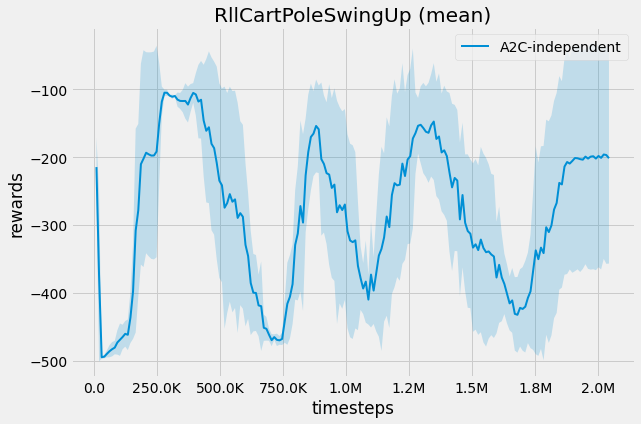

In [2]:
plot_algos_performances(f"../runs/RllCartPoleSwingUp-v0/22-05-13/17-08-30/")

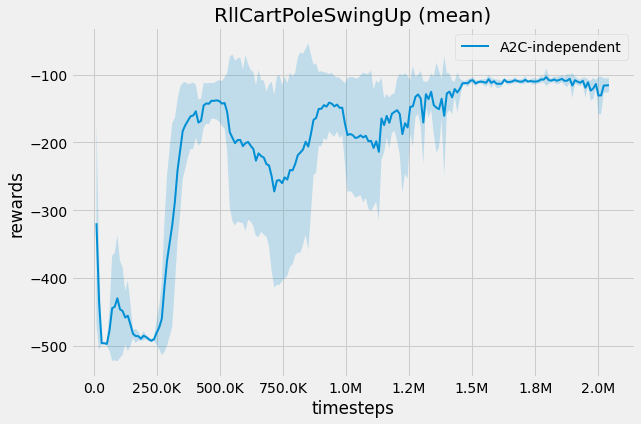

In [3]:
plot_algos_performances(f"../runs/RllCartPoleSwingUp-v0/22-05-13/16-01-53/")

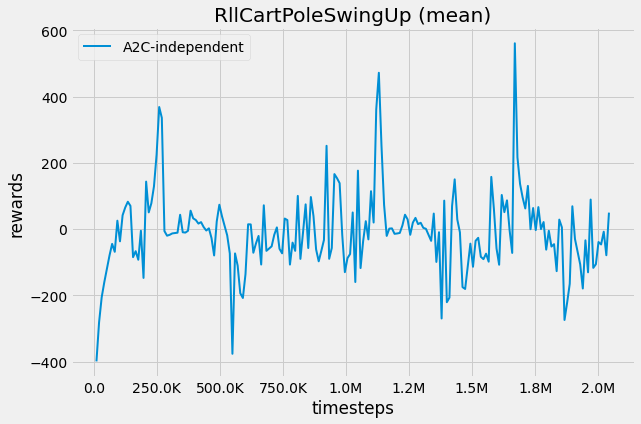

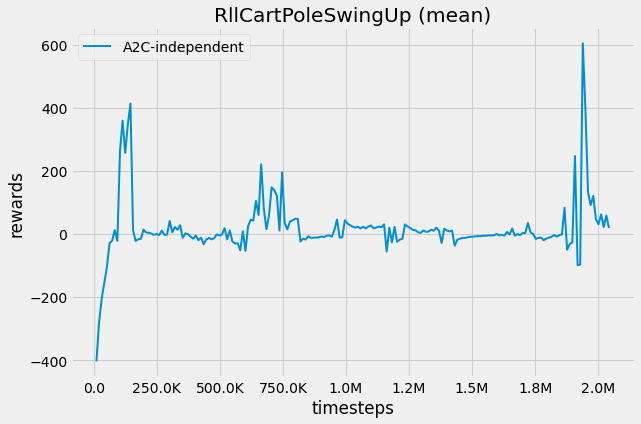

In [4]:
plot_algos_performances(f"../runs/RllCartPoleSwingUp-v0/22-05-13/11-23-20/")
plot_algos_performances(f"../runs/RllCartPoleSwingUp-v0/22-05-13/11-47-36/")

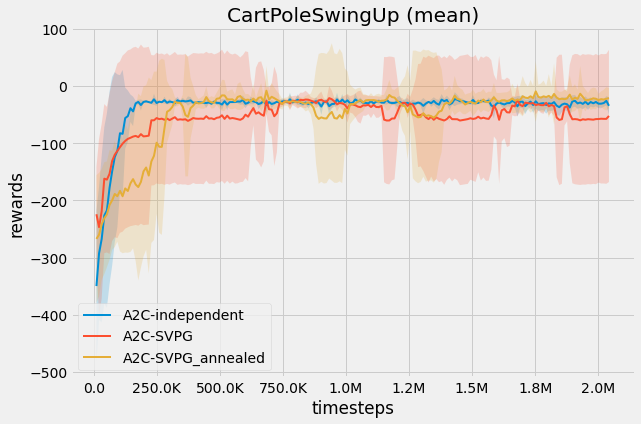

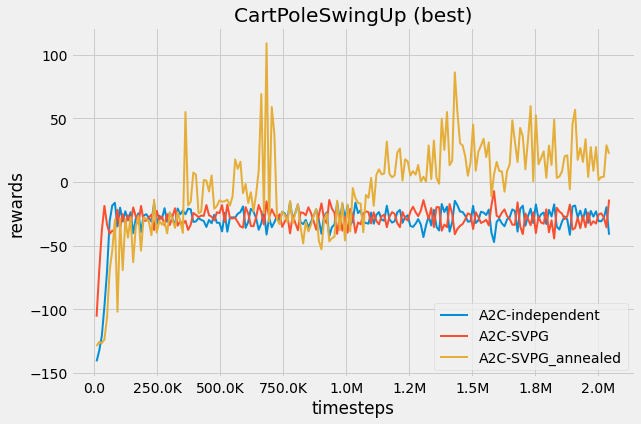

In [5]:
directory = f"../runs/CartPoleSwingUp-v0/22-05-11/22-51-45/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

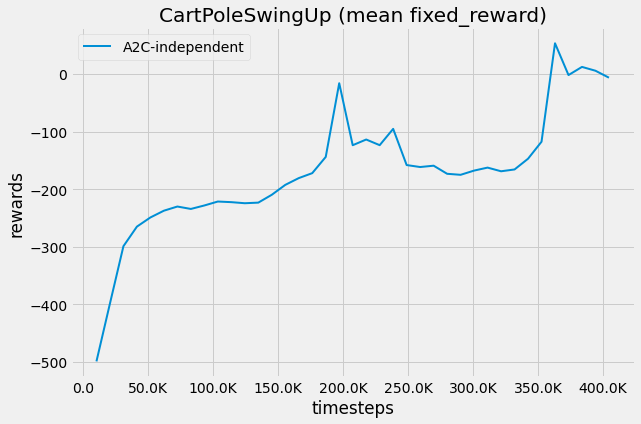

In [6]:
directory = f"../runs/CartPoleSwingUp-v0/22-05-12/10-48-17/"

plot_algos_performances(directory, suffix="fixed_reward")
# eval_agents_from_dir(directory, n_eval=1, save_render=True)

# Cartpole

### Rllab

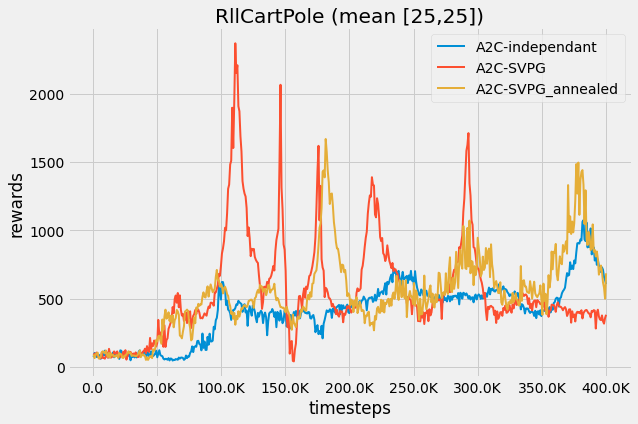

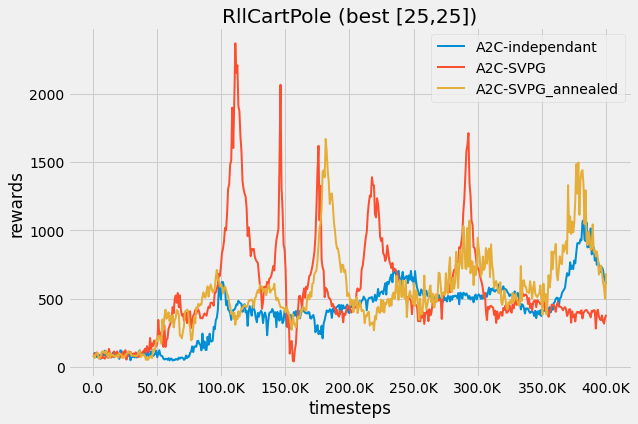

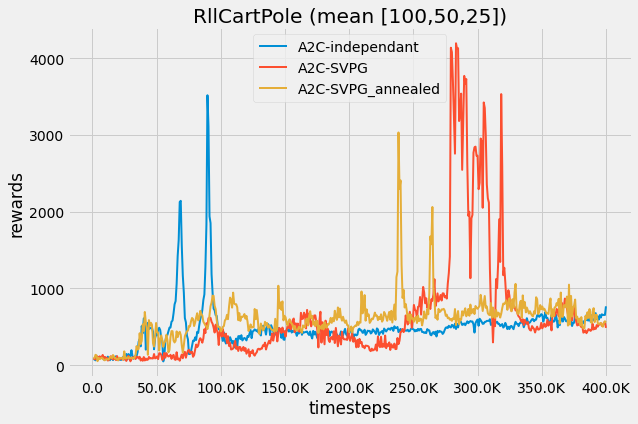

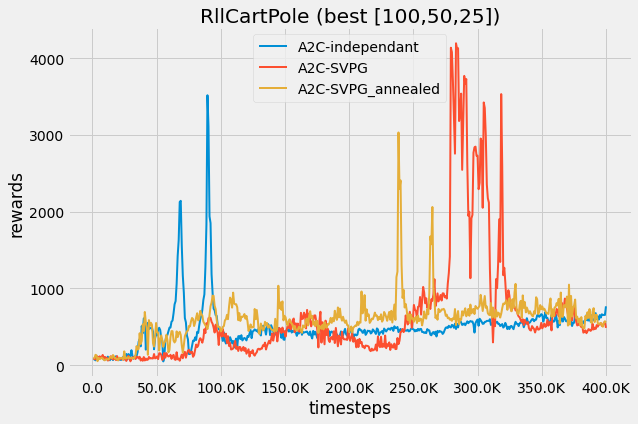

In [7]:
base_dir = f"../runs/RllCartPole-v0/22-05-08/"

plot_algos_performances(base_dir + "14-23-23/", suffix="[25,25]")
plot_algos_performances(base_dir + "14-23-23/", suffix="[25,25]", mode="best")
plot_algos_performances(base_dir + "14-53-14/", suffix="[100,50,25]")
plot_algos_performances(base_dir + "14-53-14/", suffix="[100,50,25]", mode="best")


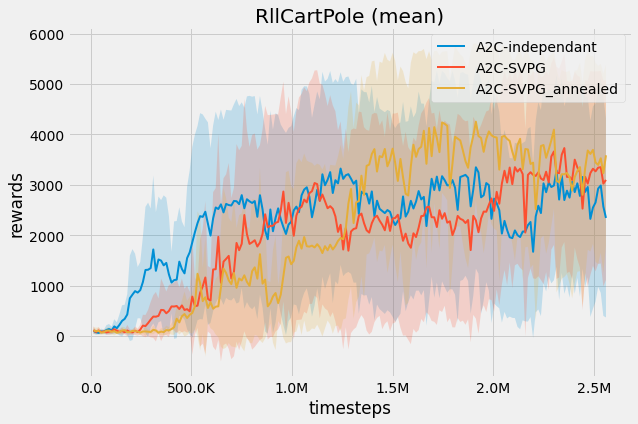

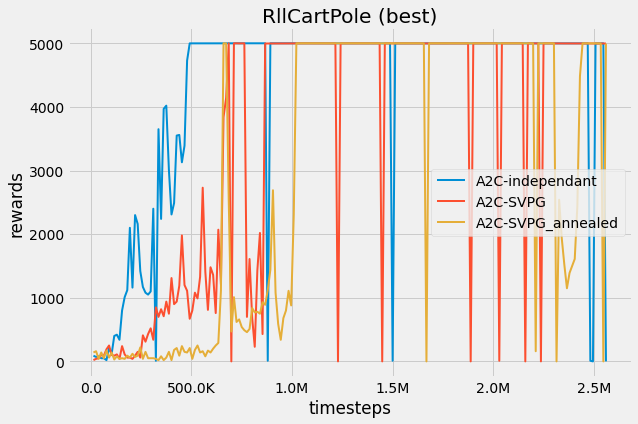

In [8]:
directory = f"../runs/RllCartPole-v0/22-05-09/10-34-00/"
plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

### Continuous

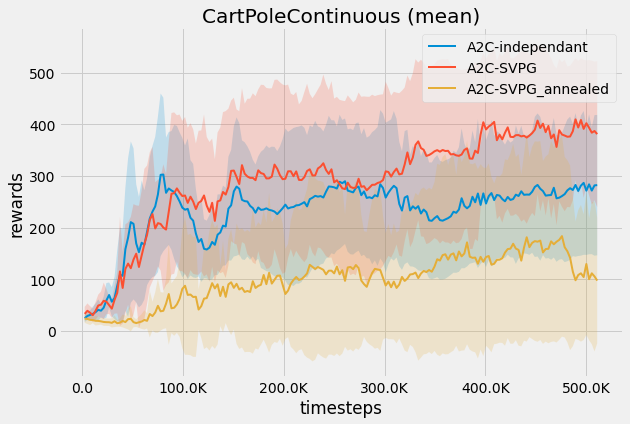

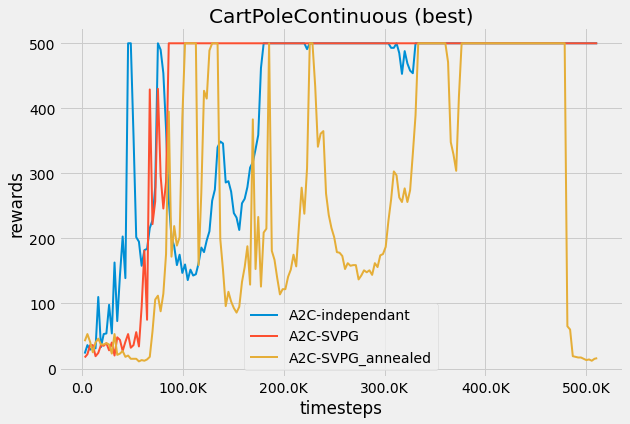

In [9]:
env_name = "CartPoleContinuous-v1"
directory = f"../runs/{env_name}/22-05-09/17-00-00/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

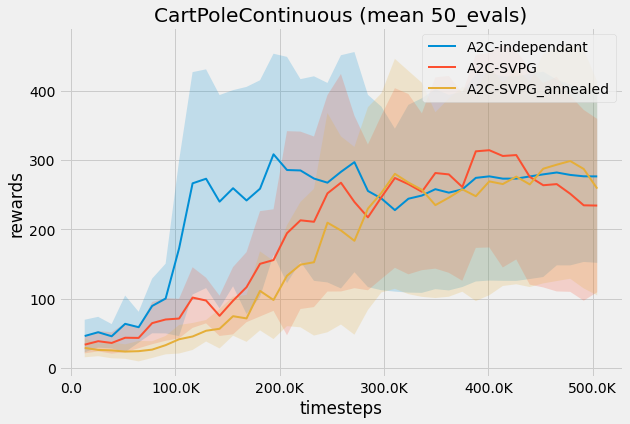

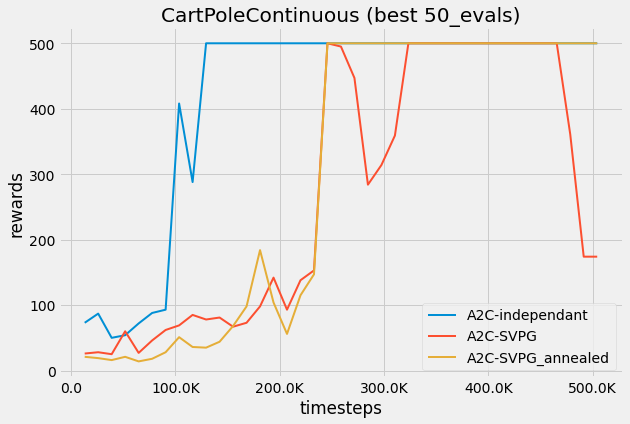

In [11]:
directory = f"../runs/{env_name}/22-05-09/19-47-53/"

plot_algos_performances(directory, suffix="50_evals")
plot_algos_performances(directory, suffix="50_evals", mode="best")

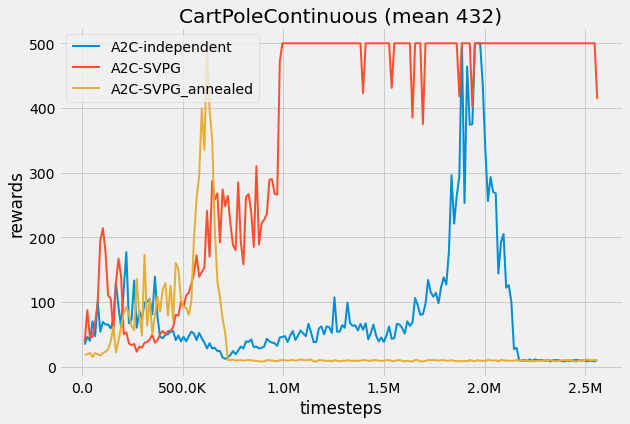

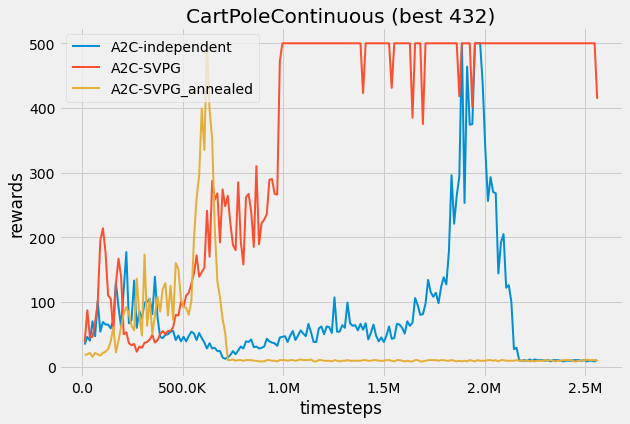

In [13]:
env_name = "CartPoleContinuous-v1"
directory = f"../runs/{env_name}/22-05-11/10-40-09/"

plot_algos_performances(directory, suffix="432")
plot_algos_performances(directory, suffix="432", mode="best")

# SwingUp

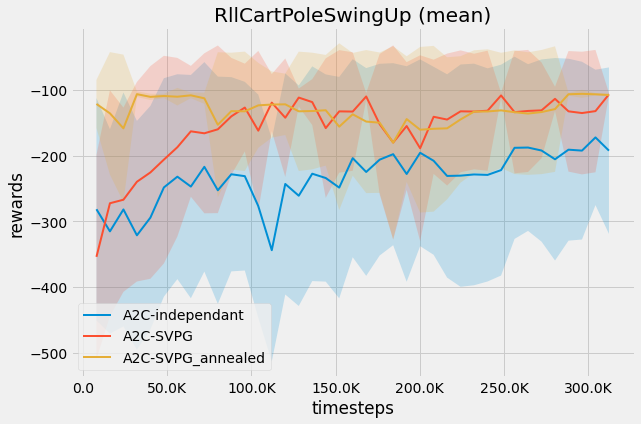

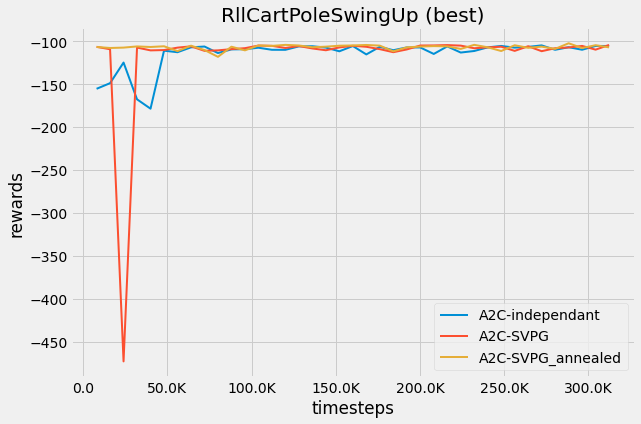

In [14]:
env_name = "RllCartPoleSwingUp-v0"
directory = f"../runs/{env_name}/22-05-07/21-28-38/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

In [15]:
rewards_list = eval_agents_from_dir(directory)

pygame 2.1.0 (SDL 2.0.16, Python 3.9.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


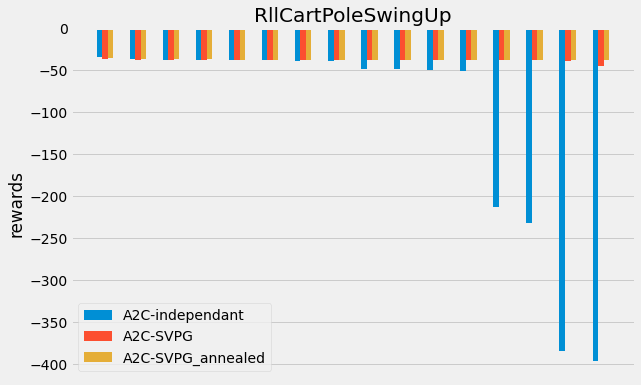

In [16]:
plot_histograms(rewards_list, "RllCartPoleSwingUp-v0")

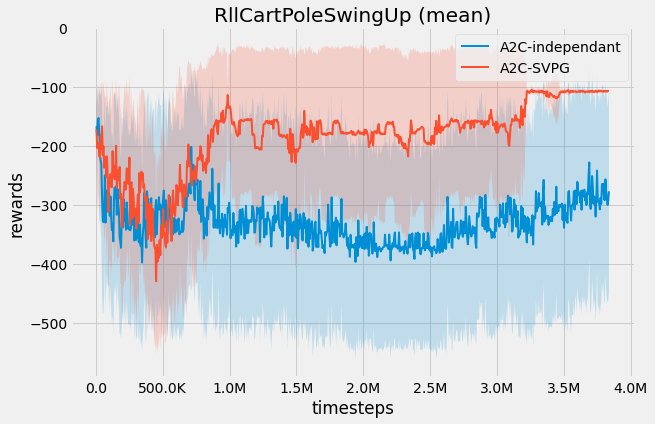

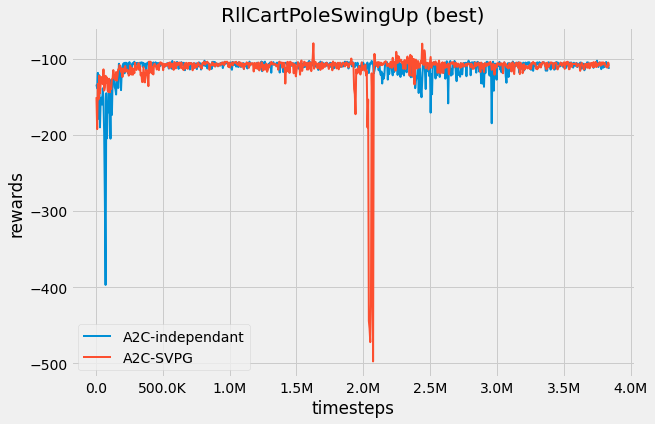

In [17]:
env_name = "RllCartPoleSwingUp-v0"
directory = f"../runs/{env_name}/22-05-09/23-36-18/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

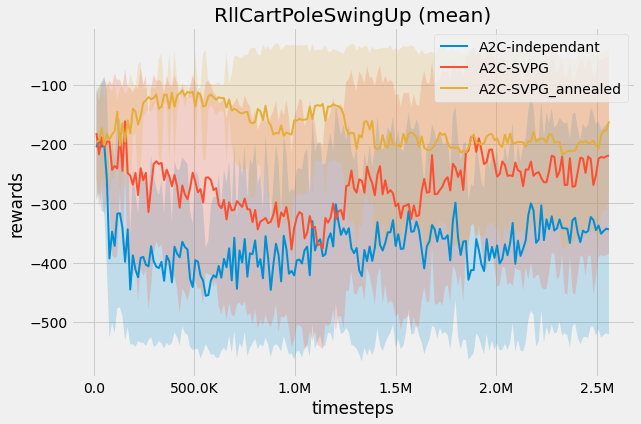

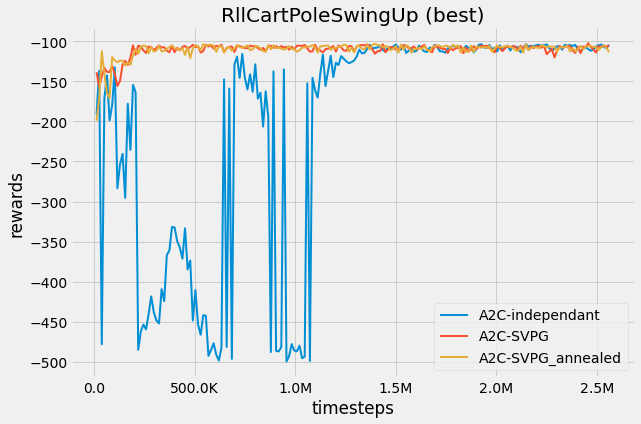

In [18]:
directory = f"../runs/{env_name}/22-05-10/09-20-57/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

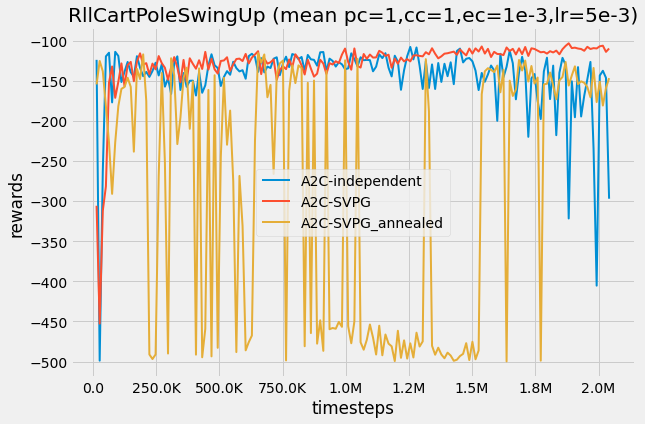

In [19]:
directory = f"../runs/{env_name}/22-05-11/12-46-54/"
suffix = "pc=1,cc=1,ec=1e-3,lr=5e-3"

plot_algos_performances(directory, suffix=suffix)

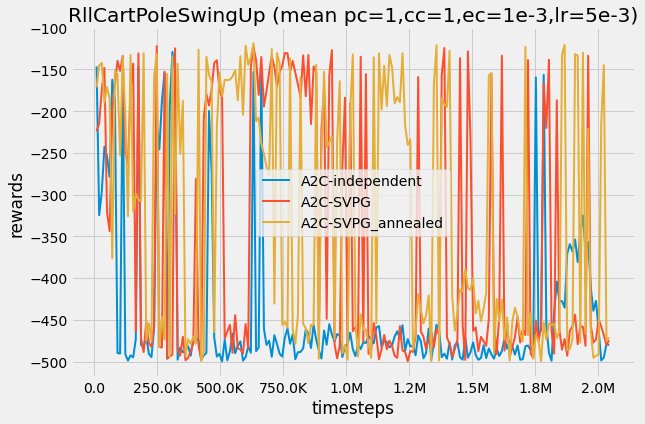

In [20]:
# pc = , cc = , ec =
# n_envs = 8, n_steps = 16

directory = f"../runs/{env_name}/22-05-11/15-18-56/"
suffix = "pc=1,cc=1,ec=1e-3,lr=5e-3"

plot_algos_performances(directory, suffix=suffix)

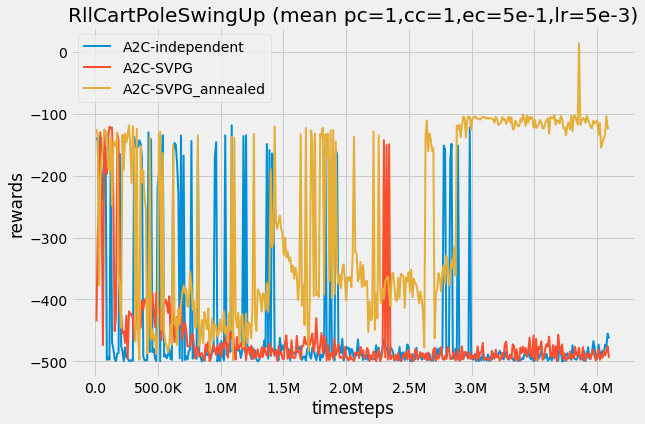

In [21]:
# pc = 1, cc = 1, ec = 0.5
# n_envs = 8, n_steps = 16

directory = f"../runs/{env_name}/22-05-11/16-04-41/"
suffix = "pc=1,cc=1,ec=5e-1,lr=5e-3"

plot_algos_performances(directory, suffix=suffix)

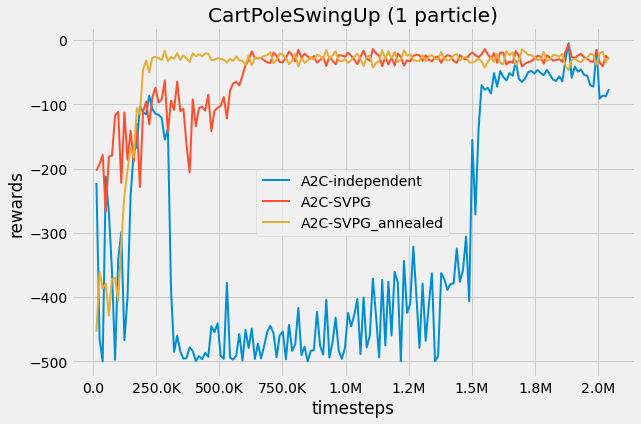

In [22]:
directory = f"../runs/CartPoleSwingUp-v0/22-05-11/20-46-49/"

plot_algos_performances(directory, mode="1 particle")

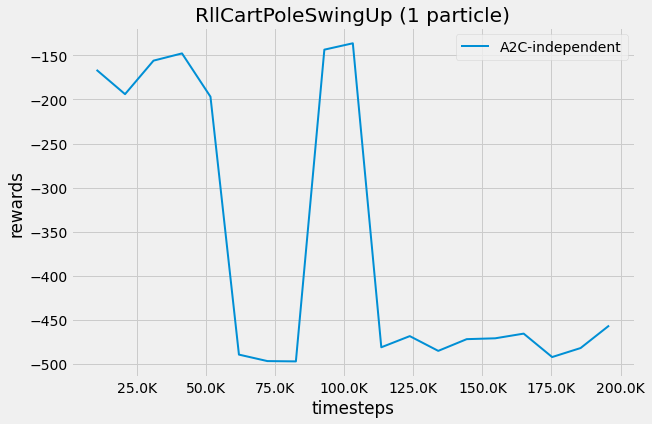

In [23]:
directory = f"../runs/RllCartPoleSwingUp-v0/22-05-12/17-37-53/"

plot_algos_performances(directory, mode="1 particle")

# Pendulum

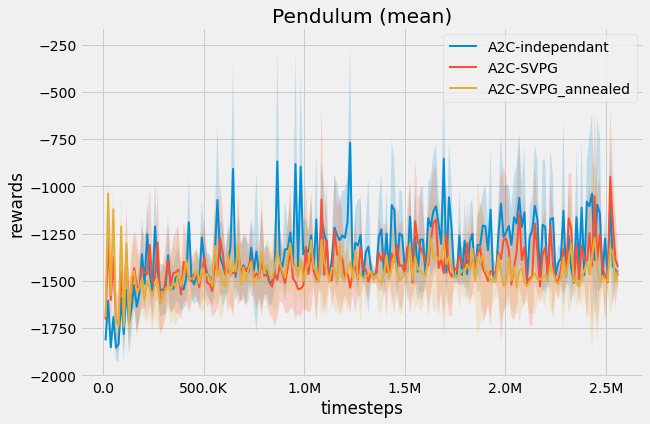

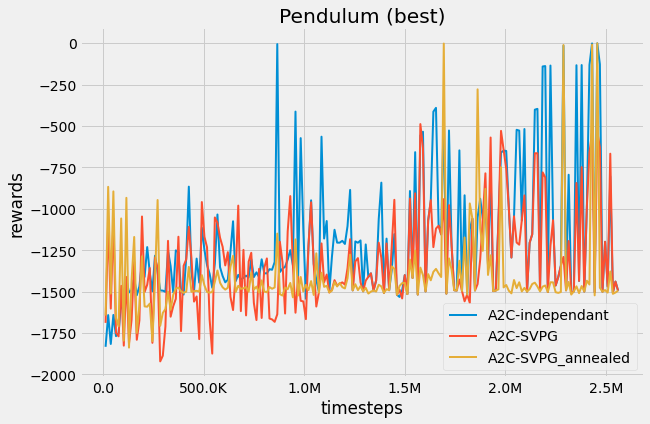

In [24]:
env_name = "Pendulum-v1"
directory = f"../runs/{env_name}/22-05-10/09-36-42/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

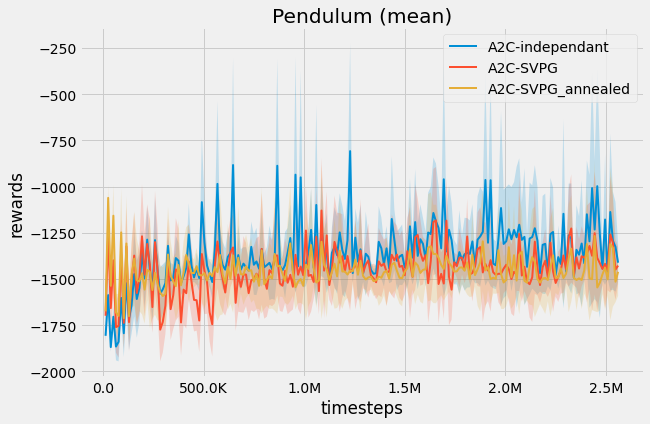

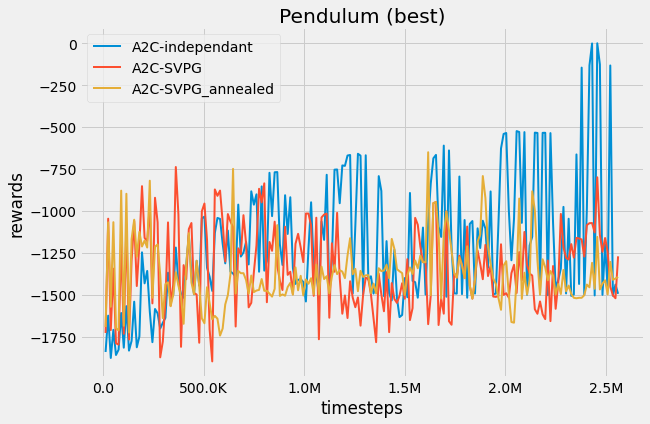

In [25]:
directory = f"../runs/{env_name}/22-05-10/21-47-46/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")

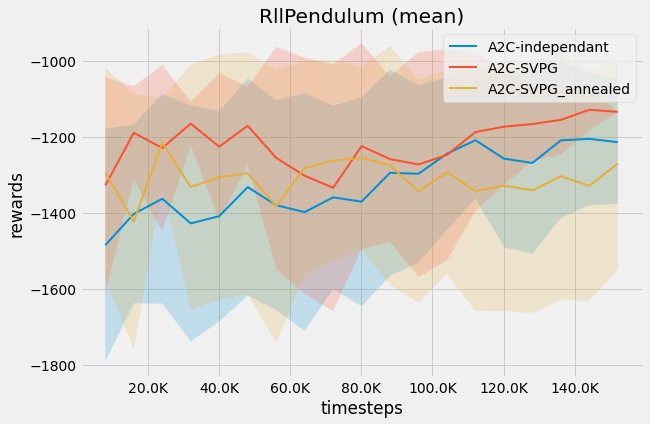

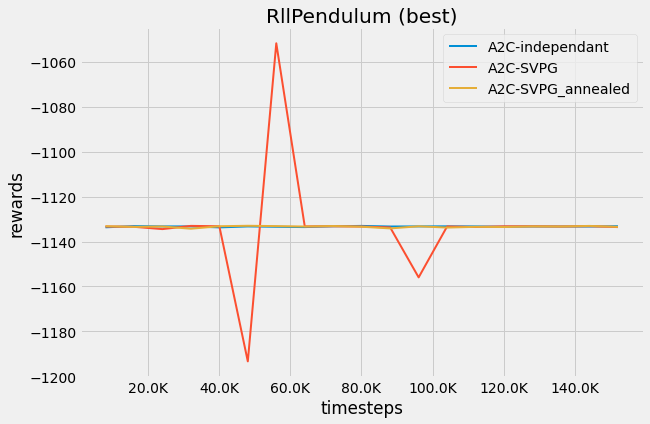

In [27]:
env_name = "RllPendulum-v0"
directory = f"../runs/{env_name}/22-05-07/21-29-40/"

plot_algos_performances(directory)
plot_algos_performances(directory, mode="best")